<a href="https://colab.research.google.com/github/CarolHeChuanxiuyue/Psychonomics_Spatial_Cognition/blob/main/immersive_VR_main_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data

/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
# from kneed import KneeLocator
# from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
traj_post = pd.read_csv("trajcPostProcess/processed_trajectory.csv")
strategy = pd.read_csv("strategy.csv")
wftime = pd.read_csv("trajcPostProcess/time.csv")
wftrajc = pd.read_csv("trajcPostProcess/trajectory.csv")
performance = wftrajc.merge(wftime, how = 'left', on=['ParticipantID','TrialNumber'])

def get_sample(strategy,performance,trial,target):
  sample = strategy[strategy['Trial'+str(trial)]==target].Subject.to_list()
  tmp = performance[(performance.Status=='Success') \
                     & (performance.TrialNumber == trial) \
                     & (performance.ParticipantID.isin(sample))][['ParticipantID','LevelDistanceTraveled','grid_distance','human_distance']]
  return tmp


In [ ]:
sample_results = get_sample(strategy,performance,8,'learned').sort_values(by=['LevelDistanceTraveled','grid_distance','ParticipantID'])
sample_results

,ParticipantID,LevelDistanceTraveled,grid_distance,human_distance
799,443,15.48,18.4,15.53


In [ ]:
traj_post[(traj_post.TrialNum ==24) & (traj_post.SubjectNum==438)]

,SubjectNum,TrialNum,Time,X,Z,X_d,Z_d
11274,438,24,341.0,1.081632,-3.221322,0.799805,-3.099609
11275,438,24,341.0,1.230271,-3.128129,1.599609,-3.099609
11276,438,24,342.0,1.536593,-2.922919,1.599609,-3.099609
11277,438,24,343.0,1.923062,-2.516510,1.599609,-3.099609
11278,438,24,343.0,1.979146,-2.376094,1.599609,-2.000000
11279,438,24,343.0,2.007201,-2.237605,2.500000,-2.000000
11280,438,24,344.0,1.955934,-1.799817,1.599609,-2.000000
11281,438,24,344.0,2.041816,-1.523038,2.500000,-2.000000
11282,438,24,344.0,2.085891,-1.389362,2.500000,-1.000000
11283,438,24,345.0,2.124309,-1.255756,2.500000,-1.000000


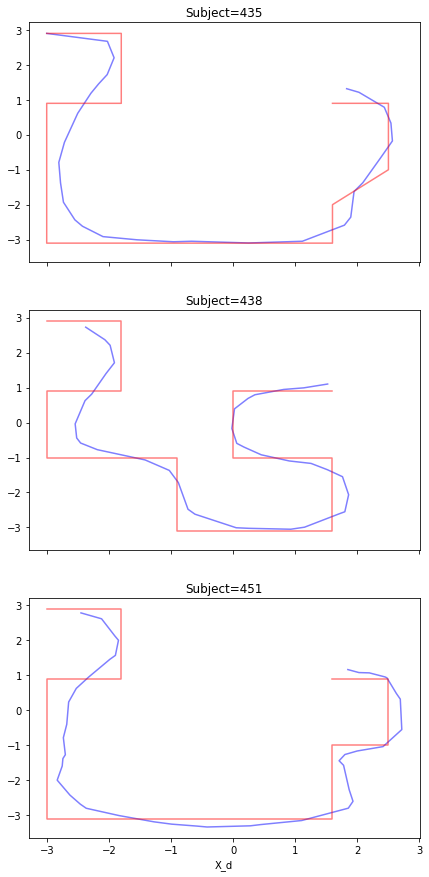

In [ ]:
plotnum = sample_results.ParticipantID.nunique()
grouped = traj_post[(traj_post.TrialNum ==9) & (traj_post.SubjectNum.isin(sample_results.ParticipantID.to_list()))].groupby('SubjectNum')
fig, axs = plt.subplots(plotnum,figsize=(7,5*plotnum),sharex=True, sharey=True)
i=0
for key, gp in grouped:
  gp.plot(ax=axs[i],x='X',y='Z',color ='blue',alpha = 0.5)
  gp.plot(ax=axs[i],x='X_d',y='Z_d',color ='red',alpha = 0.5)
  axs[i].set_title('Subject=%s'%key)
  axs[i].get_legend().remove()
  i=i+1
plt.show()

In [ ]:
from dsp_py_module import WayFindingTrajectory
from dsp_py_module import WayFindingTxtVerifier
from dsp_py_module import WayFindingAnalyzer
from dsp_py_module import Pointing
from dsp_py_module import RetracingTxtVerifier

In [ ]:
# data_path = "/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Pointing-Phase1"
# pp1 = Pointing(data_path)
# pp1.save("trajcPostProcess/pointingPhase1.csv")

# data_path = "/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Pointing-Phase2"
# pp2 = Pointing(data_path)
# pp2.save("trajcPostProcess/pointingPhase2.csv")

# # get detailed combined output for the Graph Task
# data_path = "/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Shortcutting"
# ## get successful rate and response time for each trial
# # txt = WayFindingTxtVerifier(data_path)
# # txt.save("trajcPostProcess/time.csv")

# # get trajectory (coordinate files) for each trial
# trajectory = WayFindingTrajectory('trial_info.csv',data_path)
# trajectory.clean_data_w_reboot()
# trajectory.combineTrajectory()
# trajectory.save_raw("trajcPostProcess/raw_trajectory.csv")
# trajectory.processTrajectory()
# trajectory.save_processed("trajcPostProcess/processed_trajectory.csv")

# ## get traveled distance and discretized distance for each trial
# analyzer = WayFindingAnalyzer('trajcPostProcess/processed_trajectory.csv',data_path)
# analyzer.analyze()
# analyzer.save("trajcPostProcess/trajectory.csv")

In [ ]:
trial_info.head()

,TrialID,start_x,start_y,end_x,end_y,min_gird_dis,learn_grid_dis
0,1,-3.000000,2.900391,1.599609,-2.000000,9.5,14.5
1,2,-3.000000,2.900391,0.000000,0.000000,5.9,10.9
2,3,1.599609,2.900391,-1.799805,-3.099609,9.4,14.4
3,4,1.599609,2.900391,1.599609,-1.000000,5.7,8.9
4,5,-1.799805,1.700195,1.599609,0.899902,4.2,8.4


In [ ]:
pp1 = pd.read_csv("trajcPostProcess/pointingPhase1.csv")
pp2 = pd.read_csv("trajcPostProcess/pointingPhase2.csv")

wftime = pd.read_csv("trajcPostProcess/time.csv")
wftrajc = pd.read_csv("trajcPostProcess/trajectory.csv")
trial_info = pd.read_csv("trial_info.csv")
wf = wftrajc.merge(wftime, how = 'left', on=['ParticipantID','TrialNumber'])\
            .merge(trial_info[['TrialID','min_grid_dis','learn_grid_dis']], how = 'left', left_on = 'TrialNumber', right_on = 'TrialID')\
            .drop(['TrialID'],axis=1)


def efficiency(x):
  if x['Status'] == 'Success' and x['grid_distance']+0.001 >= x['min_grid_dis']:
    return x['grid_distance']/x['min_grid_dis']
  elif x['grid_distance']+0.001 < x['min_grid_dis']:
    return 1
  else: return np.nan

wf['efficiency']=wf.apply(efficiency, axis=1)
wf['efficiency']= wf.groupby("ParticipantID")['efficiency'].transform(lambda x: x.fillna(2.19))

pp1_sub = pp1.groupby('ID')['AngErrorAbs'].mean().reset_index().\
              rename(columns={'ID':'ParticipantID','AngErrorAbs':'Point_PreError'})
pp2_sub = pp2.groupby('ID')['AngErrorAbs'].mean().reset_index().\
              rename(columns={'ID':'ParticipantID','AngErrorAbs':'Point_PostError'})
wf_sub = wf[wf.Order != 1].groupby('ParticipantID')[['efficiency','Time']].mean().reset_index()
success_rate_sub = wf[wf.Order != 1].groupby('ParticipantID')['Status'].apply(lambda x: sum(x=='Success')/23)
from functools import reduce
sub_performance = reduce(lambda x,y: pd.merge(x,y, on='ParticipantID', how='outer'), [pp1_sub,pp2_sub,wf_sub,success_rate_sub]).dropna()
sub_performance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ParticipantID    48 non-null     int64  
 1   Point_PreError   48 non-null     float64
 2   Point_PostError  48 non-null     float64
 3   efficiency       48 non-null     float64
 4   Time             48 non-null     float64
 5   Status           48 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.6 KB


In [ ]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

def bi_pr_test(r_c,N):
  df = N-2
  t_value = r_c * np.sqrt(df) / np.sqrt(1-r_c**2)
  p_value = stats.t.sf(abs(t_value), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
  z_u = np.log((1+r_c)/(1-r_c))/2 + 1.96*np.sqrt(1/(N-3))
  z_l = np.log((1+r_c)/(1-r_c))/2 - 1.96*np.sqrt(1/(N-3))
  r_u = (np.exp(2*z_u)-1)/(np.exp(2*z_u)+1)
  r_l = (np.exp(2*z_l)-1)/(np.exp(2*z_l)+1)
  print('t-statistic = %5.3f pvalue = %6.4f df = %2.0f' % (t_value,p_value,df))
  print('95CI = [%4.2f, %4.2f]' % (r_l,r_u))

def CI_conhen(var,mu):
  print("95% Confidence Interval: {}".format(stats.t.interval(0.95, var.size - 1, var.mean(), stats.sem(var))))
  cohen_d = ( var.mean() - mu )/var.std()
  print("cohen_d {}".format(round(cohen_d,2)))

def draw_ind_performance(df,trialnum):
  xgrid = [-3.7,-2.35,-1.25,-0.49,0.4,1.2,2.0,3.05]
  ygrid = [-3.7,-2.49,-1.49,-0.49,0.49,1.35,2.10,3.7]
  xctr = [round((xgrid[i+1] + xgrid[i])/2,1) for i in range(len(xgrid)-1)]
  yctr = [round((ygrid[i+1] + ygrid[i])/2,1) for i in range(len(ygrid)-1)]

  df['PosX_d'] = pd.cut(df.X, xgrid, labels=xctr).astype(np.float16)
  df['PosY_d'] = pd.cut(df.Z, ygrid, labels=yctr).astype(np.float16)

  grouped = df[df.TrialNum == trialnum].groupby('SubjectNum')
  fig, axs = plt.subplots(48,figsize=(7,240),sharex=True, sharey=True)
  i=0
  for key, gp in grouped:
    gp.plot(ax=axs[i],x='X',y='Z',color ='blue',alpha = 0.5)
    gp.plot(ax=axs[i],x='PosX_d',y='PosY_d',color ='red',alpha = 0.5)
    axs[i].set_title('Subject=%s'%key)
    axs[i].get_legend().remove()
    i=i+1
  plt.show()
  pass

# grouped = test.groupby('TrialNum')
# fig, axs = plt.subplots(24,figsize=(7,120),sharex=True, sharey=True)
# i=0
# for key, gp in grouped:
#   for labels,dfi in gp.groupby("SubjectNum"):
#     dfi.plot(ax=axs[i],x='X',y='Z',color ='red',alpha = 0.5)
#   axs[i].set_title('Trial=%s'%key)
#   axs[i].get_legend().remove()
#   i=i+1
# plt.show()

# grouped = test.groupby('TrialNum')
# fig, axs = plt.subplots(24,figsize=(7,120),sharex=True, sharey=True)
# i=0
# for key, gp in grouped:
#   for labels,dfi in gp.groupby("SubjectNum"):
#     dfi.plot(ax=axs[i],x='PosX_d',y='PosY_d',color ='red',alpha = 0.5)
#   axs[i].set_title('Trial=%s'%key)
#   axs[i].get_legend().remove()
#   i=i+1
# plt.show()

In [ ]:
test = np.loadtxt('Shortcutting/450.csv', delimiter=",", skiprows=1)

(20.0, 90.0)

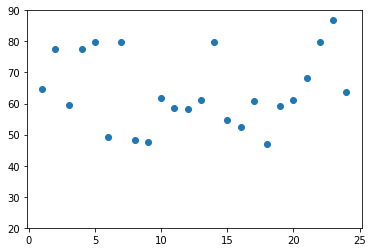

In [ ]:
p_trial = pp1.groupby('TrialID')['AngErrorAbs'].mean().reset_index()
plt.scatter(p_trial['TrialID'], p_trial['AngErrorAbs'])
plt.ylim(20,90)

In [ ]:
sub_fail = wf.groupby(['ParticipantID']).apply(lambda x: (x['Status']!='Success').sum()).reset_index(name='total_failure')
sub_fail[sub_fail['total_failure']>7]

,ParticipantID,total_failure


In [ ]:
trial_fail = wf.groupby(['TrialNumber']).apply(lambda x: (x['Status']!='Success').sum()).reset_index(name='total_failure')
trial_fail[trial_fail['total_failure']>(len(sub_fail)*0.2)]

,TrialNumber,total_failure


In [ ]:
wf[wf.Status=='Success'].shape[0]/wf.shape[0]

0.9453125

In [ ]:
w_trial = wf.groupby('TrialNumber')['efficiency'].mean().reset_index().rename(columns={'TrialNumber':'TrialID'}).merge(p_trial,on='TrialID')
w_trial.head()

,TrialID,efficiency,AngErrorAbs
0,1,1.480000,64.538459
1,2,2.592573,77.556990
2,3,1.563250,59.543738
3,4,2.247126,77.685858
4,5,1.965760,79.757415


(40.0, 90.0)

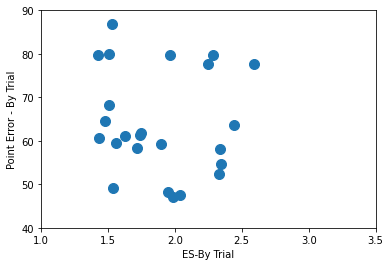

In [ ]:
plt.scatter(w_trial['efficiency'],w_trial['AngErrorAbs'],s=100)
plt.xlabel('ES-By Trial')
plt.ylabel('Point Error - By Trial')
plt.xlim(1,3.5)
plt.ylim(40,90)

In [ ]:
w_trial[['efficiency','AngErrorAbs']].corr()

,efficiency,AngErrorAbs
efficiency,1.000000,-0.080568
AngErrorAbs,-0.080568,1.000000


In [ ]:
round(sub_performance.iloc[:,1:].describe(),2)

,Point_PreError,Point_PostError,efficiency,Time,Status
count,48.00,48.00,48.00,48.00,48.00
mean,64.58,52.90,1.56,12.77,0.95
std,27.45,28.11,0.39,3.67,0.07
min,8.21,12.49,1.04,7.19,0.70
25%,46.98,26.65,1.22,9.58,0.96
50%,73.23,48.70,1.49,12.45,0.98
75%,84.41,80.40,1.75,15.70,1.00
max,102.97,99.97,2.46,21.25,1.00


In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
print(skew(sub_performance.iloc[:,1:]))
print(kurtosis(sub_performance.iloc[:,1:]))

[-0.66529872  0.06686603  0.57894228  0.30256773 -1.87343318]
[-0.69092892 -1.45932883 -0.67045669 -0.97294544  3.75937592]


In [ ]:
print("Point Phase I differ from 90")
print(stats.ttest_1samp(sub_performance['Point_PreError'], popmean = 90))
print("Point Phase I CI")
CI_conhen(sub_performance['Point_PreError'],90)
print("Efficiency differ from 2.19")
print(stats.ttest_1samp(sub_performance['efficiency'], popmean = 2.19))
print("Efficiency CI")
CI_conhen(sub_performance['efficiency'], 2.19)

Point Phase I differ from 90
Ttest_1sampResult(statistic=-6.416044829884999, pvalue=6.296797479836112e-08)
Point Phase I CI
95% Confidence Interval: (56.60513909734849, 72.5480687773043)
cohen_d -0.93
Efficiency differ from 2.19
Ttest_1sampResult(statistic=-11.165515047340657, pvalue=8.106300352812999e-15)
Efficiency CI
95% Confidence Interval: (1.4417674174387145, 1.670229222856696)
cohen_d -1.61


In [ ]:
# !pip install rpy2==3.5.1

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("splithalf")
library("splithalf")

In [ ]:
%%R -i pp1
set.seed(123)
splithalf(data=pp1,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "AngErrorAbs",
          var.participant = "ID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 50          0.87   0.82    0.92
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.87, 95% CI [0.82, 0.92]"


In [ ]:
%%R -i pp2
set.seed(123)
splithalf(data=pp2,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "AngErrorAbs",
          var.participant = "ID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 50           0.9   0.85    0.94
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.9, 95% CI [0.85, 0.94]"


In [ ]:
%%R -i wf
set.seed(123)
splithalf(data=wf,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "efficiency",
          var.participant = "ParticipantID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 48          0.87   0.79    0.92
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.87, 95% CI [0.79, 0.92]"


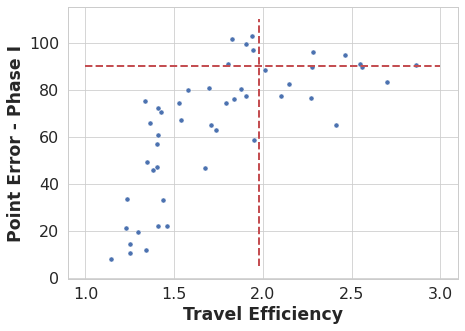

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
g = sns.scatterplot(data=sub_performance, y="Point_PreError", x="efficiency",s=25)
g.set_ylabel('Point Error - Phase I', fontweight='bold')
g.set_xlabel('Travel Efficiency', fontweight='bold')
g.plot([1,3], [90,90], 'r--', linewidth = 2)
g.plot([1.98,1.98],[5,110] , 'r--', linewidth = 2)
plt.show()

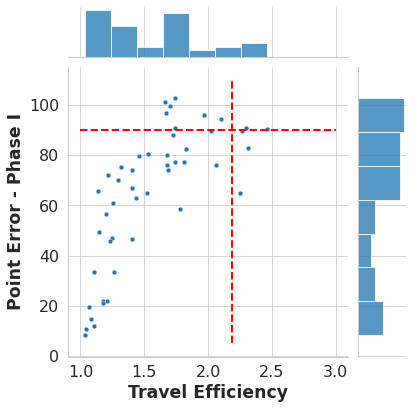

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
g = sns.jointplot(data=sub_performance, y="Point_PreError", x="efficiency")
g.ax_joint.set_ylabel('Point Error - Phase I', fontweight='bold')
g.ax_joint.set_xlabel('Travel Efficiency', fontweight='bold')
g.ax_joint.plot([1,3], [90,90], 'r--', linewidth = 2)
g.ax_joint.plot([2.19,2.19],[5,110] , 'r--', linewidth = 2)
plt.show()

In [ ]:
sub_performance[['efficiency','Point_PreError','Point_PostError']].corr()

,efficiency,Point_PreError,Point_PostError
efficiency,1.000000,0.737588,0.802240
Point_PreError,0.737588,1.000000,0.776632
Point_PostError,0.802240,0.776632,1.000000


In [ ]:
pearsonr_ci(sub_performance['efficiency'],sub_performance['Point_PreError'])

(0.7375878919105958,
 2.231011746366112e-09,
 0.5736822591460535,
 0.8446960050636345)

In [ ]:
#Travel Efficiency - SplitHalf:0.87
print(0.737588/math.sqrt(0.87*0.87))
print(0.802240/math.sqrt(0.87*0.90))
print(0.776632/math.sqrt(0.87*0.90))

0.8478022988505748
0.9066161085745982
0.8776763582400621


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(sub_performance[['Point_PreError','Point_PostError','efficiency']])
# X = sc.fit_transform(sub_performance[['Point_PreError','efficiency']])

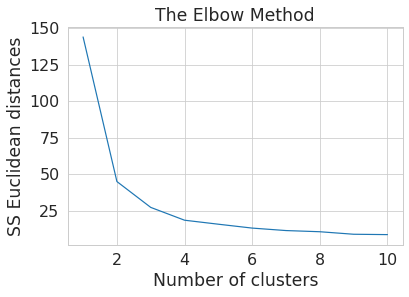

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SS Euclidean distances')
plt.show()

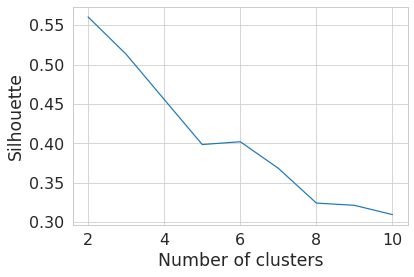

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  score = silhouette_score(X,kmeans.labels_)
  silhouette_coefficients.append(score)
plt.plot(range(2, 11), silhouette_coefficients)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print("low spatial: {}".format(sum(y_kmeans == 0)))
print("high spatial: {}".format(sum(y_kmeans == 1)))

low spatial: 24
high spatial: 24


In [ ]:
sub_performance['high_spatial']=y_kmeans
iVR_l = sub_performance[sub_performance.high_spatial==0]
iVR_h = sub_performance[sub_performance.high_spatial==1]

In [ ]:
pd.set_option('display.max_columns',500)
round(sub_performance.groupby('high_spatial')[['Point_PreError','efficiency','Point_PostError']].describe(),2)

Point_PreError                                                   \
                      count   mean    std    min    25%   50%    75%     max   
high_spatial                                                                   
0                      24.0  85.14  11.16  58.77  77.49  85.7  91.95  102.97   
1                      24.0  44.02  23.09   8.21  21.81  46.9  65.03   75.34   

             efficiency                                            \
                  count  mean   std   min   25%   50%   75%   max   
high_spatial                                                        
0                  24.0  1.88  0.28  1.46  1.68  1.76  2.07  2.46   
1                  24.0  1.23  0.13  1.04  1.13  1.21  1.30  1.52   

             Point_PostError                                                   
                       count   mean    std    min    25%    50%    75%    max  
high_spatial                                                                   
0                       24.0  77.54  14.25  45.35  70.45  80.55  85.05  99.97  
1                       24.0  28.27  12.04  12.49  17.42  26.64  36.64  51.07

In [ ]:
sub_performance.groupby('high_spatial')[['Point_PreError','efficiency','Point_PostError']].agg({skew,kurtosis})

Point_PreError           efficiency           Point_PostError  \
                       skew  kurtosis       skew  kurtosis            skew   
high_spatial                                                                 
0                 -0.416167 -0.235206   0.613232 -0.783747       -0.702390   
1                 -0.170511 -1.462411   0.499535 -0.591720        0.408915   

                        
              kurtosis  
high_spatial            
0            -0.088519  
1            -1.086292

In [ ]:
print("Point Phase I differ from 90")
print(stats.ttest_1samp(iVR_l['Point_PreError'], popmean = 90))
print("Point Phase I CI")
CI_conhen(iVR_l['Point_PreError'],90)
print("Efficiency differ from 2.0")
print(stats.ttest_1samp(iVR_l['efficiency'], popmean = 2.19))
print("Efficiency CI")
CI_conhen(iVR_l['efficiency'], 2.19)

Point Phase I differ from 90
Ttest_1sampResult(statistic=-2.1347354735016917, pvalue=0.04366177172019303)
Point Phase I CI
95% Confidence Interval: (80.42281610313346, 89.84944547568598)
cohen_d -0.44
Efficiency differ from 2.0
Ttest_1sampResult(statistic=-5.457147345924186, pvalue=1.511750542935008e-05)
Efficiency CI
95% Confidence Interval: (1.7662622722424495, 1.9992123102602435)
cohen_d -1.11


In [ ]:
pp_l = pp1[pp1.ID.isin(iVR_l.ParticipantID.to_list())]
pp_h = pp1[pp1.ID.isin(iVR_h.ParticipantID.to_list())]
pp2_l = pp2[pp2.ID.isin(iVR_l.ParticipantID.to_list())]
pp2_h = pp2[pp2.ID.isin(iVR_h.ParticipantID.to_list())]
wf_l = wf[wf.ParticipantID.isin(iVR_l.ParticipantID.to_list()) & (wf.Order != 1)]
wf_h = wf[wf.ParticipantID.isin(iVR_h.ParticipantID.to_list())& (wf.Order != 1)]

In [ ]:
%%R -i pp_l
set.seed(123)
splithalf(data=pp_l,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "AngErrorAbs",
          var.participant = "ID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 24          0.12  -0.33    0.55
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.12, 95% CI [-0.33, 0.55]"


In [ ]:
%%R -i pp_h
set.seed(123)
splithalf(data=pp_h,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "AngErrorAbs",
          var.participant = "ID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 24          0.85   0.73    0.93
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.85, 95% CI [0.73, 0.93]"


In [ ]:
%%R -i wf_l
set.seed(123)
splithalf(data=wf_l,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "efficiency",
          var.participant = "ParticipantID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 24          0.53   0.19    0.77
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.53, 95% CI [0.19, 0.77]"


In [ ]:
%%R -i wf_h
set.seed(123)
splithalf(data=wf_h,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "efficiency",
          var.participant = "ParticipantID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 24          0.58   0.32    0.78
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.58, 95% CI [0.32, 0.78]"


In [ ]:
%%R -i pp2_l
set.seed(123)
splithalf(data=pp2_l,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "AngErrorAbs",
          var.participant = "ID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 24          0.47   0.14    0.73
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.47, 95% CI [0.14, 0.73]"


In [ ]:
%%R -i pp2_h
set.seed(123)
splithalf(data=pp2_h,
          outcome = "accuracy",
          score = "average",
          halftype = "random",
          permutations = 5000,
          var.ACC = "AngErrorAbs",
          var.participant = "ID",
          average="mean")

  |======================================================================| 100%[1] "condition all complete"
[1] "Calculating split half estimates"
[1] "split half estimates for 5000 random splits"
  condition  n spearmanbrown SB_low SB_high
1       all 24          0.62   0.33    0.82
[1] "this could be reported as: using 5000 random splits, the spearman-brown corrected reliability  estimate for the all condition was 0.62, 95% CI [0.33, 0.82]"


In [ ]:
iVR_l[['efficiency','Point_PreError','Point_PostError']].corr()

,efficiency,Point_PreError,Point_PostError
efficiency,1.000000,0.022800,0.121232
Point_PreError,0.022800,1.000000,-0.096606
Point_PostError,0.121232,-0.096606,1.000000


In [ ]:
#Travel Efficiency - SplitHalf:0.53
print(0.022800/math.sqrt(0.12*0.53))
print(0.121232/math.sqrt(0.53*0.47))
print(-0.096606/math.sqrt(0.12*0.47))
print("low Spatial: Efficiency vs. Phase I")
print(pearsonr_ci(iVR_l.efficiency,iVR_l.Point_PreError))

0.09040788077186843
0.24290161712133698
-0.4067846424327607
low Spatial: Efficiency vs. Phase I
(0.022799568685344686, 0.9157844186354387, -0.38413008960577777, 0.4223121590762332)


In [ ]:
bi_pr_test(0.09040788077186843,24)

t-statistic = 0.426 pvalue = 0.6744 df = 22
95CI = [-0.32, 0.48]


In [ ]:
bi_pr_test(0.4067846424327607,24)

t-statistic = 2.089 pvalue = 0.0485 df = 22
95CI = [0.00, 0.70]


In [ ]:
iVR_h[['efficiency','Point_PreError','Point_PostError']].corr()

,efficiency,Point_PreError,Point_PostError
efficiency,1.000000,0.719079,0.537333
Point_PreError,0.719079,1.000000,0.658136
Point_PostError,0.537333,0.658136,1.000000


In [ ]:
#Travel Efficiency - SplitHalf:0.58
print(0.719079/math.sqrt(0.85*0.58))
print(0.537333/math.sqrt(0.58*0.62))
print(0.658136/math.sqrt(0.85*0.62))

1.024125420423003
0.8960529455486225
0.9065887796362962


In [ ]:
pearsonr_ci(iVR_h.efficiency,iVR_h.Point_PreError)

(0.7190792096217773,
 7.517763487290646e-05,
 0.4446697023512241,
 0.8700863334088628)

In [ ]:
bi_pr_test(0.583828,24)

t-statistic = 3.373 pvalue = 0.0027 df = 22
95CI = [0.24, 0.80]


In [ ]:
ivrl = pearsonr_ci(iVR_l['efficiency'],iVR_l['Point_PreError'])
ivrh = pearsonr_ci(iVR_h['efficiency'],iVR_h['Point_PreError'])

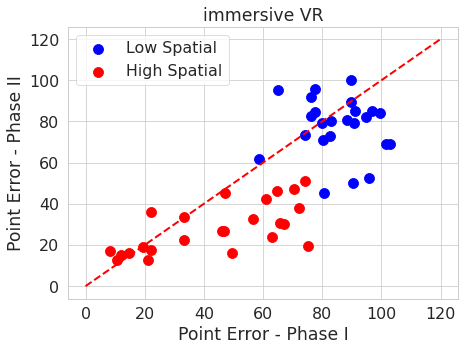

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(iVR_l['Point_PreError'], iVR_l['Point_PostError'], s = 100, c = 'blue', label = 'Low Spatial')
plt.scatter(iVR_h['Point_PreError'], iVR_h['Point_PostError'], s = 100, c = 'red', label = 'High Spatial')
# plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('immersive VR')
plt.xlabel('Point Error - Phase I')
plt.ylabel('Point Error - Phase II')
plt.plot([0,120], [0,120], 'r--', linewidth = 2)
plt.legend()
plt.show()

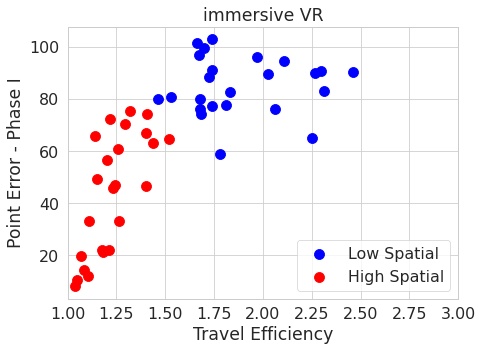

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(iVR_l['efficiency'], iVR_l['Point_PreError'], s = 100, c = 'blue', label = 'Low Spatial')
plt.scatter(iVR_h['efficiency'], iVR_h['Point_PreError'], s = 100, c = 'red', label = 'High Spatial')
# plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('immersive VR')
plt.ylabel('Point Error - Phase I')
plt.xlabel('Travel Efficiency')
plt.xlim(1.0,3)
plt.legend()
plt.show()

In [ ]:
df_dt = pd.read_csv('PointingDSP-Performance.csv')

In [ ]:
df_dt.head()

,subject,ES,Point_PreError,Point_PostError
0,605,1.460539,83.003704,39.786944
1,606,1.677974,60.559259,67.919781
2,607,2.033846,96.070370,100.933572
3,608,1.754325,100.388889,80.637814
4,609,1.221699,29.781481,22.183362


In [ ]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          57 non-null     int64  
 1   ES               57 non-null     float64
 2   Point_PreError   57 non-null     float64
 3   Point_PostError  57 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.9 KB


In [ ]:
pearsonr_ci(df_dt['ES'],df_dt['Point_PreError'])

(0.7339600654453852,
 8.268390702727318e-11,
 0.5853356618289655,
 0.8348632521253622)

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(df_dt[['Point_PreError','Point_PostError','ES']])

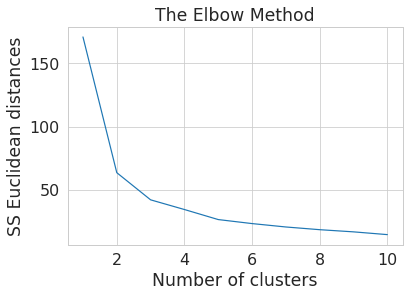

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SS Euclidean distances')
plt.show()

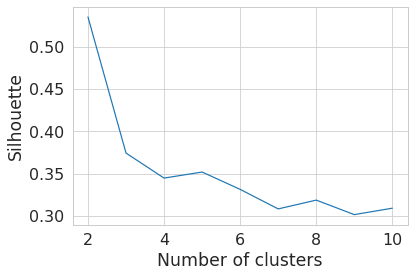

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  score = silhouette_score(X,kmeans.labels_)
  silhouette_coefficients.append(score)
plt.plot(range(2, 11), silhouette_coefficients)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print("low spatial: {}".format(sum(y_kmeans == 1)))
print("high spatial: {}".format(sum(y_kmeans == 0)))

low spatial: 41
high spatial: 16


In [ ]:
df_dt['low_spatial']=y_kmeans
dVR_l = df_dt[df_dt.low_spatial==1]
dVR_h = df_dt[df_dt.low_spatial==0]

In [ ]:
df_dt.to_csv('pointingDSP_w_c.csv',index=False)

In [ ]:
pd.set_option('display.max_columns',500)
round(df_dt.groupby('low_spatial')[['Point_PreError','ES','Point_PostError']].describe(),2)

Point_PreError                                                    \
                     count   mean    std    min    25%    50%    75%     max   
low_spatial                                                                    
0                     16.0  42.21  20.21  12.09  29.75  41.31  51.79   83.00   
1                     41.0  86.58  13.13  59.77  78.42  85.43  99.18  106.46   

               ES                                           Point_PostError  \
            count  mean   std   min   25%   50%   75%   max           count   
low_spatial                                                                   
0            16.0  1.37  0.23  1.02  1.23  1.34  1.50  1.91            16.0   
1            41.0  2.04  0.26  1.51  1.81  2.12  2.25  2.54            41.0   

                                                               
              mean    std    min    25%    50%    75%     max  
low_spatial                                                    
0            30.83  12.07   8.52  24.67  28.52  39.00   53.41  
1            76.29  15.89  51.41  64.33  74.45  86.97  112.37

In [ ]:
df_dt.groupby('low_spatial')[['Point_PreError','ES','Point_PostError']].agg({skew,kurtosis})

Point_PreError                  ES           Point_PostError  \
                      skew  kurtosis      skew  kurtosis            skew   
low_spatial                                                                
0                  0.30626 -0.558489  0.597337  0.064646        0.013137   
1                 -0.14611 -0.963466 -0.121854 -0.980585        0.393739   

                       
             kurtosis  
low_spatial            
0           -0.631606  
1           -0.757576

In [ ]:
print("Point Phase I differ from 90")
print(stats.ttest_1samp(dVR_l['Point_PreError'], popmean = 90))
print("Point Phase I CI")
CI_conhen(dVR_l['Point_PreError'],90)
print("Efficiency differ from 2.0")
print(stats.ttest_1samp(dVR_l['ES'], popmean = 2.5))
print("Efficiency CI")
CI_conhen(dVR_l['ES'], 2.5)

Point Phase I differ from 90
Ttest_1sampResult(statistic=-1.6674528740434995, pvalue=0.10323621439259607)
Point Phase I CI
95% Confidence Interval: (82.43438902768114, 90.7253219027615)
cohen_d -0.26
Efficiency differ from 2.0
Ttest_1sampResult(statistic=-11.370326889310848, pvalue=4.192283095972679e-14)
Efficiency CI
95% Confidence Interval: (1.955458481556279, 2.1198265493009836)
cohen_d -1.78


In [ ]:
dVR_l[['ES','Point_PreError','Point_PostError']].corr()

,ES,Point_PreError,Point_PostError
ES,1.00000,0.181020,0.313410
Point_PreError,0.18102,1.000000,0.309063
Point_PostError,0.31341,0.309063,1.000000


In [ ]:
#Travel Efficiency - SplitHalf:0.19
print(0.181020/math.sqrt(0.19*0.39))
print(0.31341/math.sqrt(0.19*0.59))
print(0.309063/math.sqrt(0.39*0.59))
print("low Spatial: Efficiency vs. Phase I")
print(pearsonr_ci(dVR_l.ES,dVR_l.Point_PreError))

0.6649935861612708
0.9360736993217993
0.6443008533355095
low Spatial: Efficiency vs. Phase I
(0.18101957142216574, 0.2573682738471, -0.13409894402546907, 0.46289125403880155)


In [ ]:
bi_pr_test(0.18101957142216574,41)

t-statistic = 1.149 pvalue = 0.2574 df = 39
95CI = [-0.13, 0.46]


In [ ]:
bi_pr_test(0.31341,41)

t-statistic = 2.061 pvalue = 0.0460 df = 39
95CI = [0.01, 0.57]


In [ ]:
pearsonr_ci(dVR_h['ES'],dVR_h['Point_PreError'])

(0.602410792711868,
 0.013527827918911299,
 0.1521360678004736,
 0.8456034946432931)

In [ ]:
bi_pr_test(0.602410792711868,16)

t-statistic = 2.824 pvalue = 0.0135 df = 14
95CI = [0.15, 0.85]


In [ ]:
dVR_h[['ES','Point_PreError','Point_PostError']].corr()

,ES,Point_PreError,Point_PostError
ES,1.000000,0.602411,0.507224
Point_PreError,0.602411,1.000000,0.764749
Point_PostError,0.507224,0.764749,1.000000


In [ ]:
bi_pr_test(0.764749,16)

t-statistic = 4.441 pvalue = 0.0006 df = 14
95CI = [0.43, 0.91]


In [ ]:
#Travel Efficiency - SplitHalf:0.67
print(0.602411/math.sqrt(0.67*0.86))
print(0.507224/math.sqrt(0.67*0.70))
print(0.764749/math.sqrt(0.86*0.70))

0.7936084191933565
0.7406505901911732
0.9856453381210712


In [ ]:
bi_pr_test(0.7406505901911732,16)

t-statistic = 4.125 pvalue = 0.0010 df = 14
95CI = [0.39, 0.90]


In [ ]:
dvrl = pearsonr_ci(dVR_l['ES'],dVR_l['Point_PreError'])
dvrh = pearsonr_ci(dVR_h['ES'],dVR_h['Point_PreError'])

In [ ]:
rdf = pd.DataFrame([ivrl,ivrh,dvrl,dvrh], columns=['r', 'p', 'ci_l','ci_h'])

In [ ]:
rdf['interface']=['iVR','iVR','Desktop','Desktop']
rdf['Spatial']  = ['low','high','low','high']
rdf['ci'] = rdf.apply(lambda x: [x['r']-x['ci_l'],x['ci_h']-x['r']],axis=1)
rdf

,r,p,ci_l,ci_h,interface,Spatial,ci
0,0.022800,0.915784,-0.384130,0.422312,iVR,low,"[0.40692965829112243, 0.39951259039088854]"
1,0.719079,0.000075,0.444670,0.870086,iVR,high,"[0.2744095072705532, 0.15100712378708547]"
2,0.181020,0.257368,-0.134099,0.462891,Desktop,low,"[0.3151185154476348, 0.2818716826166358]"
3,0.602411,0.013528,0.152136,0.845603,Desktop,high,"[0.4502747249113944, 0.24319270193142506]"


In [ ]:
rdf_p = rdf.pivot("interface", "Spatial", ["r","ci"])

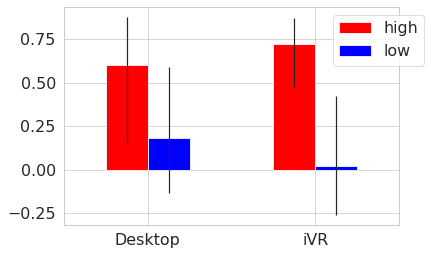

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
rdf_p.plot(kind='bar',y='r',yerr = 'ci',color=['red', 'blue'])
# plt.errorbar(x = rdf_p.index,y=rdf_p['r'],yerr = rdf_p['ci_l'], fmt='.k')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=0)
plt.xlabel("")
plt.show()

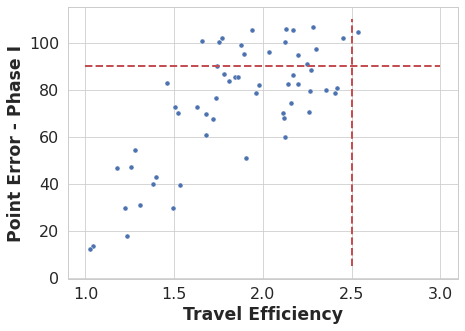

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
g = sns.scatterplot(data=df_dt, y="Point_PreError", x="ES",s=25)
g.set_ylabel('Point Error - Phase I', fontweight='bold')
g.set_xlabel('Travel Efficiency', fontweight='bold')
g.plot([1,3], [90,90], 'r--', linewidth = 2)
g.plot([2.5,2.5],[5,110] , 'r--', linewidth = 2)
plt.show()

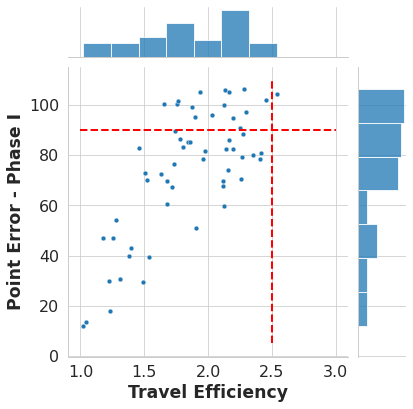

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
g = sns.jointplot(data=df_dt, y="Point_PreError", x="ES")
g.ax_joint.set_ylabel('Point Error - Phase I', fontweight='bold')
g.ax_joint.set_xlabel('Travel Efficiency', fontweight='bold')
g.ax_joint.plot([1,3], [90,90], 'r--', linewidth = 2)
g.ax_joint.plot([2.5,2.5],[5,110] , 'r--', linewidth = 2)
plt.show()

In [ ]:
df_dt.iloc[:,1:].corr()

,ES,Point_PreError,Point_PostError
ES,1.000000,0.733960,0.755823
Point_PreError,0.733960,1.000000,0.797031
Point_PostError,0.755823,0.797031,1.000000


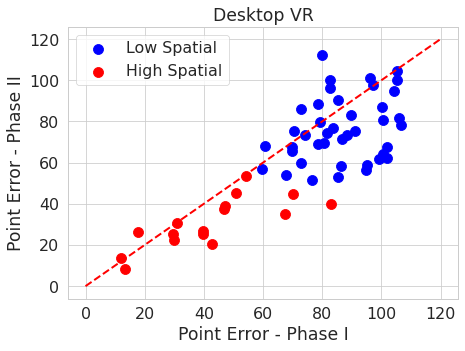

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(dVR_l['Point_PreError'], dVR_l['Point_PostError'], s = 100, c = 'blue', label = 'Low Spatial')
plt.scatter(dVR_h['Point_PreError'], dVR_h['Point_PostError'], s = 100, c = 'red', label = 'High Spatial')
# plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Desktop VR')
plt.xlabel('Point Error - Phase I')
plt.ylabel('Point Error - Phase II')
plt.plot([0,120], [0,120], 'r--', linewidth = 2)
plt.legend()
plt.show()

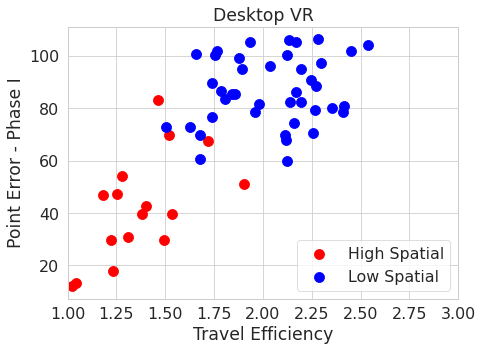

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(dVR_h['ES'], dVR_h['Point_PreError'], s = 100, c = 'red', label = 'High Spatial')
plt.scatter(dVR_l['ES'], dVR_l['Point_PreError'], s = 100, c = 'blue', label = 'Low Spatial')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Desktop VR')
plt.ylabel('Point Error - Phase I')
plt.xlabel('Travel Efficiency')
plt.xlim(1.0,3)
# plt.ylim(0,120)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ivr = sc.fit_transform(sub_performance[['Point_PreError','Point_PostError','efficiency']])
X_dt = sc.fit_transform(df_dt[['Point_PreError','Point_PostError','ES']])

In [ ]:
X = np.vstack((X_ivr,X_dt))

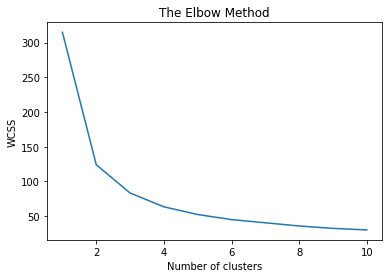

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SS Euclidean distances')
plt.show()

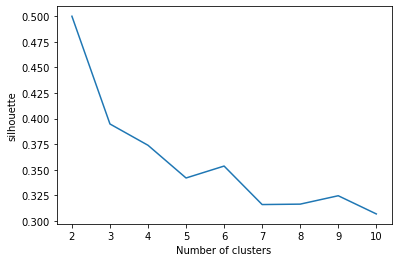

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  score = silhouette_score(X,kmeans.labels_)
  silhouette_coefficients.append(score)
plt.plot(range(2, 11), silhouette_coefficients)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print("low spatial: {}".format(sum(y_kmeans == 1)))
print("high spatial: {}".format(sum(y_kmeans == 0)))

low spatial: 64
high spatial: 41


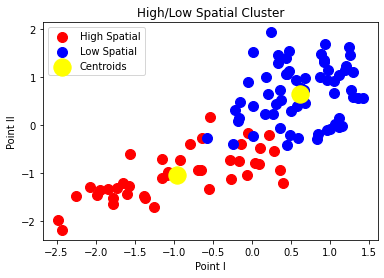

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Spatial')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Spatial')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('High/Low Spatial Cluster')
plt.xlabel('Point I')
plt.ylabel('Point II')
plt.legend()
plt.show()

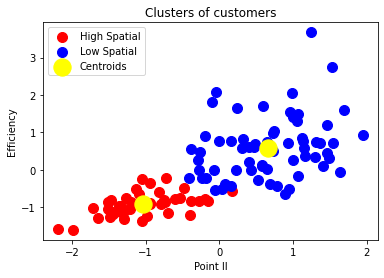

In [ ]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'High Spatial')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Low Spatial')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Point II')
plt.ylabel('Efficiency')
plt.legend()
plt.show()

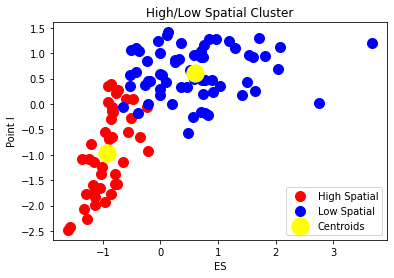

In [ ]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'High Spatial')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Low Spatial')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')
plt.title('High/Low Spatial Cluster')
plt.ylabel('Point I')
plt.xlabel('ES')
plt.legend()
plt.show()

In [ ]:
sub_performance.head()

,ParticipantID,Point_PreError,Point_PostError,efficiency,Time,Status
0,401,80.167838,70.982890,1.878545,12.353276,0.958333
1,402,75.342183,19.569756,1.397160,11.616234,0.833333
2,403,22.049294,36.208874,1.439517,10.119215,0.916667
3,404,62.920977,23.746961,1.736605,7.868896,0.958333
4,405,33.383814,33.383814,1.234754,9.574401,0.958333


In [ ]:
df_dt.head()

,subject,ES,Point_PreError,Point_PostError
0,605,1.460539,83.003704,39.786944
1,606,1.677974,60.559259,67.919781
2,607,2.237721,96.070370,100.933572
3,608,1.803649,100.388889,80.637814
4,609,1.221699,29.781481,22.183362


In [ ]:
# sub_performance['ParticipantID'].values.tolist()

In [ ]:
ID = sub_performance['ParticipantID'].append(df_dt['subject'],ignore_index=True).values

In [ ]:
ID

array([401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635,
       636, 637, 640, 641, 642, 643, 645, 646, 647, 648, 649, 650, 651,
       653, 656, 657, 658, 660, 662, 663, 664, 665, 666, 667, 668, 669,
       670])

In [ ]:
pd.Series(y_kmeans)

0      1
1      0
2      0
3      0
4      0
      ..
100    0
101    1
102    1
103    0
104    1
Length: 105, dtype: int32

In [ ]:
test = pd.concat({'ID':pd.Series(ID),'lowSpatials': pd.Series(y_kmeans)},axis=1)

In [ ]:
test.to_csv('cluster.csv',index=False)

In [ ]:
sub_performance[['Point_PreError','Point_PostError','efficiency']]

In [ ]:
y_kmeans

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [ ]:
rw_w = pd.read_csv('RW-efficiency.csv')
rw_p = pd.read_csv('RW-pointing.csv')

In [ ]:
rw_w.head()

,ID,gender,condition,1,2,3,4,5,6,7,8,9,10,effmean
0,3,f,control,1.274797,1.695161,0.980467,0.971465,3.195994,1.212599,1.107267,1.016833,1.031853,1.207148,1.369358
1,4,f,experiemental,1.301199,1.580098,1.053899,1.111704,1.067753,1.215890,1.022697,0.991379,1.091409,0.953359,1.138939
2,5,m,experiemental,3.088008,1.765457,1.029185,0.994249,2.384129,0.980003,1.114218,1.026986,1.189092,0.998780,1.457011
3,6,f,control,0.996573,0.990536,1.036962,0.990301,1.169585,1.215276,0.990683,0.970154,1.119756,0.971625,1.045145
4,7,f,experiemental,1.242954,0.984634,1.008520,1.160752,1.430794,0.975835,1.416386,1.010828,1.006229,0.986961,1.122389


In [ ]:
rw_p.head()

,ID,condition,gender,Question #1,Question #2,Question #3,Question #4,Question #5,Question #6,Question #7,...,Question #24,Question #25,Question #26,Question #27,Question #28,Question #29,Question #30,Question #31,Question #32,pointing mean
0,3,control,f,152.30,41.06,85.15,15.80,108.75,62.52,41.83,...,126.19,110.55,13.25,9.36,57.95,119.94,19.45,26.45,31.00,82.90
1,4,experiemental,f,24.02,140.94,73.27,39.13,1.83,20.59,110.37,...,175.43,61.94,176.25,20.98,30.92,5.36,83.05,152.14,141.58,63.16
2,5,experiemental,m,50.77,36.76,33.67,7.35,11.16,86.69,23.01,...,10.66,163.41,127.18,8.79,170.29,35.24,177.75,107.02,147.92,83.16
3,6,control,f,41.89,153.16,3.65,7.37,14.06,78.41,22.36,...,159.00,100.77,45.54,25.43,28.66,82.16,14.43,91.64,13.74,55.39
4,7,experiemental,f,30.21,116.31,33.41,40.77,2.52,13.71,42.83,...,46.50,83.06,162.01,39.07,83.63,16.66,91.33,100.94,59.78,78.79


In [ ]:
rw = rw_p[['ID','pointing mean']].merge(rw_w[['ID','effmean']],on='ID')

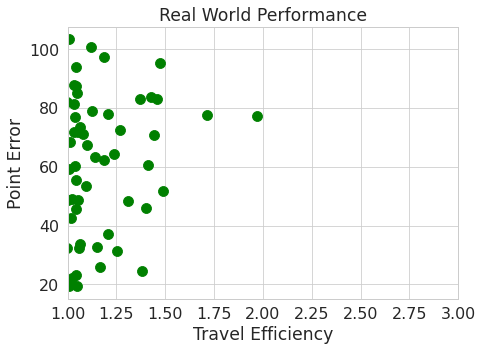

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(rw['effmean'],rw['pointing mean'],s = 100, c = 'green')
plt.title('Real World Performance')
plt.ylabel('Point Error')
plt.xlabel('Travel Efficiency')
# plt.legend()
plt.xlim(1.0,3.0)
plt.show()

In [ ]:
cd /content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data

In [ ]:
pp1.head()

,TrialOrder,TrialID,AngleResponse,AngleCorr,AngError,Start,End,RT,ID,AngErrorAbs
0,16,1,59.50664,139.862700,-80.356060,Well,Stove,6.205200,432,80.356060
1,24,2,62.74468,-49.852790,112.597470,Wheelbarrow,Stove,6.555389,432,112.597470
2,14,3,113.37210,-36.094070,149.466170,Mailbox,Piano,4.537155,432,149.466170
3,17,4,135.38980,-2.913495,138.303295,Harp,Piano,5.054222,432,138.303295
4,4,5,140.90610,-121.530500,262.436600,Bookshelf,Table,5.204155,432,97.563400


In [ ]:
wf['disDistance']=np.round(wf['disDistance'],2)

In [ ]:
def read_pointing_data():
  pointData = pd.DataFrame()
  dirList = os.listdir()
  for dir in dirList:
    if 'csv' in dir:
      tmp = pd.read_csv(dir)
      tmp['ID'] = dir.split(".")[0]
      pointData = pd.concat([pointData,tmp])
  pointData.columns = ['TrialOrder','TrialID','AngleResponse','AngleCorr','AngError','Start','End','RT','ID']
  pointData['AngErrorAbs'] =  pointData['AngError'].apply(lambda x: abs(x) if abs(x)<=180 else 360-abs(x))
  return pointData


In [ ]:
pp1 = read_pointing_data()

In [ ]:
pp1.head()

,TrialOrder,TrialID,AngleResponse,AngleCorr,AngError,Start,End,RT,ID,AngErrorAbs
0,16,1,59.50664,139.862700,-80.356060,Well,Stove,6.205200,432,80.356060
1,24,2,62.74468,-49.852790,112.597470,Wheelbarrow,Stove,6.555389,432,112.597470
2,14,3,113.37210,-36.094070,149.466170,Mailbox,Piano,4.537155,432,149.466170
3,17,4,135.38980,-2.913495,138.303295,Harp,Piano,5.054222,432,138.303295
4,4,5,140.90610,-121.530500,262.436600,Bookshelf,Table,5.204155,432,97.563400


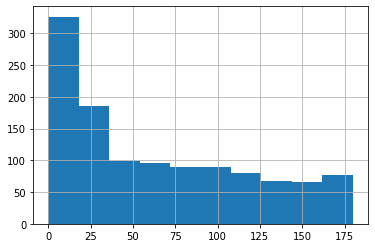

In [ ]:
pp1.AngErrorAbs.hist()

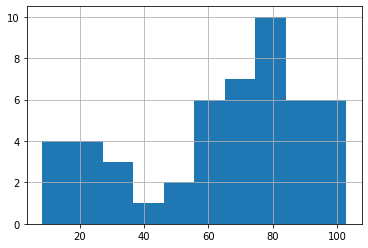

In [ ]:
pp1.groupby('ID').AngErrorAbs.mean().hist()

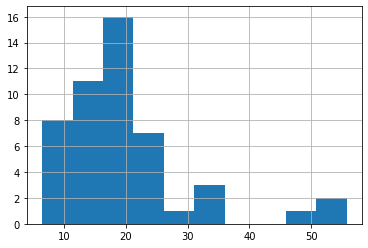

In [ ]:
pp1.groupby('ID').RT.mean().hist()

In [ ]:
cd /content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Pointing-Phase2

/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Pointing-Phase2


In [ ]:
pp2 = read_pointing_data()

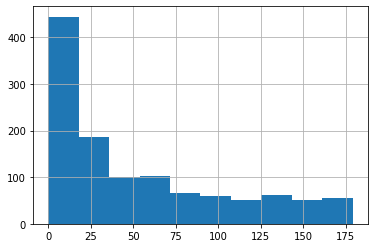

In [ ]:
pp2.AngErrorAbs.hist()

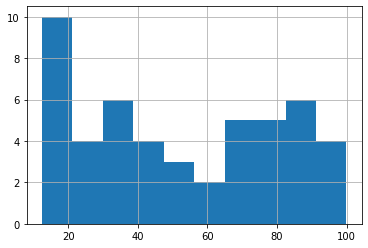

In [ ]:
pp2.groupby('ID').AngErrorAbs.mean().hist()

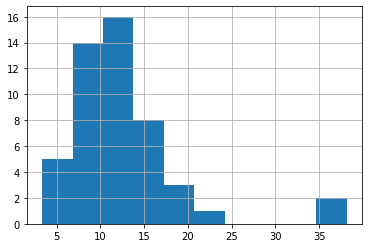

In [ ]:
pp2.groupby('ID').RT.mean().hist()

In [ ]:
pp1_sub = pp1.groupby('ID').AngErrorAbs.mean().reset_index().rename(columns={'AngErrorAbs':'PointPhaseI'})
pp2_sub = pp2.groupby('ID').AngErrorAbs.mean().reset_index().rename(columns={'AngErrorAbs':'PointPhaseII'})

In [ ]:
sub_performance.ID.unique()

array(['401', '402', '403', '404', '405', '407', '408', '409', '410',
       '411', '412', '413', '414', '415', '416', '417', '418', '419',
       '420', '425', '426', '427', '428', '429', '430', '431', '432',
       '433', '434', '435', '436', '437', '438', '439', '440', '442',
       '443', '444', '445', '446'], dtype=object)

In [ ]:
wftime.head()

,ParticipantID,Order,TrialNumber,StartingObject,TargetObject,Status,Time
0,411,1,21,Mailbox,Trashcan,Success,24.50064
1,411,2,23,Chair,Piano,Success,16.92520
2,411,3,3,Piano,Mailbox,Success,11.32771
3,411,4,11,Trashcan,Telescope,Success,13.44858
4,411,5,10,Bookshelf,Plant,Success,12.55031


In [ ]:
wftime.Status.value_counts()/wftime.shape[0]

Success    0.949275
Failure    0.050725
Name: Status, dtype: float64

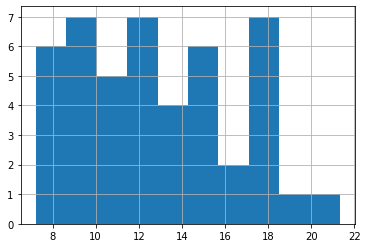

In [ ]:
wftime.groupby(['ParticipantID'])['Time'].mean().hist()

In [ ]:
# analyzer = WayFindingAnalyzer(data_path)
# analyzer.clean_data_w_reboot()
# analyzer.analyze()
# analyzer.save("trajcPostProcess/trajectory.csv")

In [ ]:
wftrajc = pd.read_csv('trajcPostProcess/trajectory.csv')

In [ ]:
# wf combined with status & time & order
wf = wftrajc.merge(wftime, how = 'left', on=['ParticipantID','TrialNumber'])

In [ ]:
wf.head()

,ParticipantID,TrialNumber,LevelDistanceTraveled,Order,StartingObject,TargetObject,Status,Time
0,401,1,10.543832,11.0,Stove,Well,Success,15.220480
1,401,2,4.612121,24.0,Stove,Wheelbarrow,Success,9.310570
2,401,3,10.094299,15.0,Piano,Mailbox,Success,13.048530
3,401,4,5.101734,13.0,Piano,Harp,Success,8.051310
4,401,5,6.797431,19.0,Table,Bookshelf,Success,8.524899


In [ ]:
wf[wf.TrialNumber == 6].head()

,ParticipantID,TrialNumber,LevelDistanceTraveled,Order,StartingObject,TargetObject,Status,Time
5,401,6,8.230878,14.0,Table,Chair,Success,9.017736
29,402,6,21.042456,15.0,Table,NaN,Failure,30.000000
53,403,6,7.512608,8.0,Table,Chair,Success,9.557037
77,404,6,8.218490,4.0,Table,Chair,Success,8.934931
101,405,6,7.520680,4.0,Table,Chair,Success,11.405880


In [ ]:
# min after filtering out failure
shortcut_list = wf[(wf.Status == 'Success' )& (wf.ParticipantID != 414)].groupby('TrialNumber')['LevelDistanceTraveled'].idxmin().to_list()
standard = wf.loc[shortcut_list].reset_index()

In [ ]:
standard

,index,ParticipantID,TrialNumber,LevelDistanceTraveled,Order,StartingObject,TargetObject,Status,Time
0,312,407,1,6.954633,3.0,Stove,Well,Success,8.272778
1,961,424,2,3.768628,12.0,Stove,Wheelbarrow,Success,6.798365
2,338,408,3,7.343851,14.0,Piano,Mailbox,Success,8.329473
3,243,406,4,4.856430,15.0,Piano,Harp,Success,6.541183
4,28,402,5,3.457244,19.0,Table,Bookshelf,Success,4.875914
5,677,418,6,7.086069,17.0,Table,Chair,Success,9.429131
6,966,424,7,6.654117,22.0,Plant,Trashcan,Success,8.418217
7,343,408,8,4.260258,24.0,Plant,Harp,Success,5.603617
8,800,443,9,5.037762,17.0,Bookshelf,Stove,Success,6.331358
9,969,424,10,5.634788,19.0,Bookshelf,Plant,Success,7.529987


In [ ]:
cd /content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Shortcutting

/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Shortcutting


In [ ]:
import os

In [ ]:
def read_shortcutting_data():
  scData = pd.DataFrame()
  dirList = os.listdir()
  for dir in dirList:
    if 'csv' in dir:
      tmp = pd.read_csv(dir)
      scData = pd.concat([scData,tmp])
  scData.columns = ['ID','TrialID','TimeStamp','PosX','PosY','PosZ','Orient']
  scData = scData[~((scData.PosX==0) & (scData.PosY==0) & (scData.Orient==0))]
  scData = scData[scData['ID']!='Participant ID']
  scData = scData.astype({"TrialID": str,"ID": str}, errors='raise') 
  scData['Order'] = (scData.groupby('ID')['TrialID']
                                .transform(lambda x: pd.factorize(x)[0]+1))
  scData = scData.astype({"PosX": np.float16,"PosZ": np.float16,"PosY":np.float16,"Orient":np.float16,"TimeStamp":np.float16,"Order":np.uint8}, errors='raise')
  scData = scData.astype({"TrialID": np.int64,"ID": np.int64}, errors='raise') 
  return scData

In [ ]:
scTraj = read_shortcutting_data()

In [ ]:
wf = scTraj.merge(wftime, how = 'left', left_on = ['ID','TrialID'],
                   right_on =['ParticipantID','TrialNumber'])

In [ ]:
wf.head()

,ID,TrialID,TimeStamp,PosX,PosY,PosZ,Orient,Order_x,ParticipantID,Order_y,TrialNumber,StartingObject,TargetObject,Status,Time
0,401,19,195.750,1.700195,1.798828,-1.946289,88.6875,1,401.0,1.0,19.0,Well,Table,Success,12.36172
1,401,19,196.000,1.700195,1.798828,-1.944336,88.7500,1,401.0,1.0,19.0,Well,Table,Success,12.36172
2,401,19,196.250,1.682617,1.822266,-1.942383,87.5000,1,401.0,1.0,19.0,Well,Table,Success,12.36172
3,401,19,196.375,1.645508,1.833984,-1.937500,86.0000,1,401.0,1.0,19.0,Well,Table,Success,12.36172
4,401,19,196.625,1.622070,1.836914,-1.946289,92.1250,1,401.0,1.0,19.0,Well,Table,Success,12.36172


In [ ]:
wf_c = wf[(wf.Status == 'Success') & (wf.ID != 414) & (wf.Order_x != 1)]

In [ ]:
wf_c.ID.nunique()

45

In [ ]:
wf.ID.nunique()

48

In [ ]:
wf.ID.unique()

array([401, 402, 403, 404, 405, 425, 426, 428, 429, 430, 406, 431, 432,
       407, 408, 409, 411, 412, 433, 435, 436, 437, 413, 414, 438, 439,
       415, 416, 418, 440, 442, 419, 420, 443, 444, 445, 446, 447, 422,
       448, 424, 449, 450, 451, 417, 410, 423, 421])

In [ ]:
np.sort(wf_c.ID.unique())

array([401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 428,
       429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 442, 443,
       444, 445, 446, 447, 448, 449])

In [ ]:
np.sort(wftime.ParticipantID.unique())

array([401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 442,
       443, 444, 445, 446, 447, 448, 449])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
grouped = wf_c.groupby('TrialID')
#targets = zip(grouped.groups.keys(), axs.flatten())

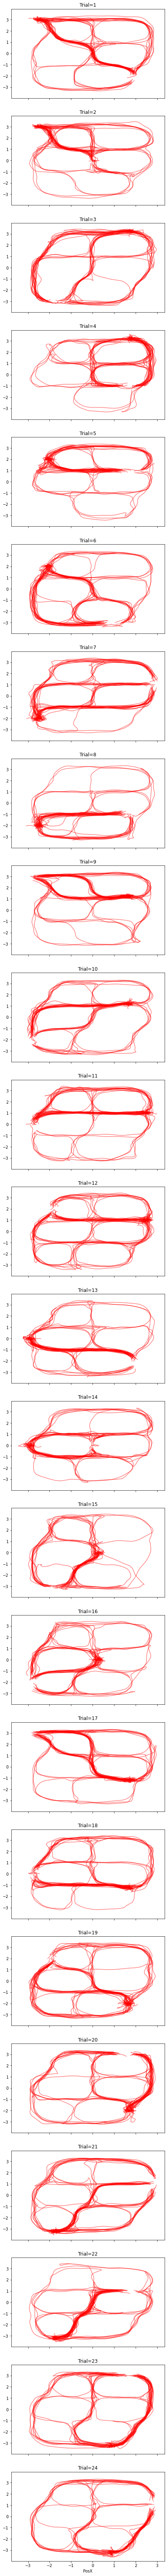

In [ ]:
grouped = wf_c.groupby('TrialID')
fig, axs = plt.subplots(24,figsize=(7,120),sharex=True, sharey=True)
i=0
for key, gp in grouped:
  for labels,dfi in gp.groupby("ID"):
    dfi.plot(ax=axs[i],x='PosX',y='PosZ',color ='red',alpha = 0.5)
  axs[i].set_title('Trial=%s'%key)
  axs[i].get_legend().remove()
  i=i+1
plt.show()

In [ ]:
wf_c.PosX.describe()

count    52719.000000
mean        -0.129395
std          1.775391
min         -3.453125
25%         -1.829102
50%         -0.044617
75%          1.598145
max          3.017578
Name: PosX, dtype: float64

In [ ]:
wf_c.PosZ.describe()

count    52719.000000
mean         0.148438
std          1.949219
min         -3.615234
25%         -1.233398
50%          0.209961
75%          1.539062
max          3.605469
Name: PosZ, dtype: float64

In [ ]:
# xgrid = np.linspace(-3.8, 3.5, 8)
# ygrid = np.linspace(-4, 4, 8)
# xctr = xgrid[:-1] + np.diff(xgrid)/2
# yctr = ygrid[:-1] + np.diff(ygrid)/2
# xctr = xctr.astype(np.float16)
# yctr = yctr.astype(np.float16)
# print('xctr is: ', xctr)
# print('yctr is: ', yctr)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cd /content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Shortcutting

/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/Shortcutting


In [ ]:
xgrid = [-3.7,-2.35,-1.25,-0.49,0.4,1.2,2.0,3.05]
ygrid = [-3.7,-2.49,-1.49,-0.49,0.49,1.35,2.10,3.7]
xctr = [-3,-2,-1,0,0.8,1.6,2.4]
yctr = [-3,-2,-1,0,1,2,2.7]

In [ ]:
array = np.loadtxt('421.csv', delimiter=",", skiprows=1)

In [ ]:
array = array[array[:,1]==10]

In [ ]:
test = array[array[:,1]==10]

In [ ]:
test = test[:,[3,5]]

In [ ]:
cd /content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data

/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data


In [ ]:
data_path = '/content/drive/MyDrive/Hegarty Lab RA Folder/WalkingDSP-22Spring/Data/test'
analyzer = WayFindingAnalyzer('min_dis.csv',data_path)
analyzer.analyze()
analyzer.save("trajcPostProcess/test.csv")

In [ ]:
import pandas as pd

In [ ]:
test = pd.read_csv("trajcPostProcess/test.csv")

In [ ]:
def discre_coord(df):
    discre = pd.concat(
        [pd.cut(df['PosX'], xgrid, labels=xctr),
        pd.cut(df['PosZ'], ygrid, labels=yctr)],
        axis=1
    ).astype(np.float16).rename(columns={"PosX": "PosX_d", "PosZ": "PosZ_d"})
    trac = pd.concat([discre,df], axis=1)
    trac = trac.round({'TimeStamp': 0}).drop_duplicates(subset=['ID','TrialID','TimeStamp','PosX_d','PosZ_d'])
    return trac

In [ ]:
trac = discre_coord(wf_c)
# trac.head()
# trac.PosX_d.unique()
# trac.PosZ_d.unique()

In [ ]:
np.sort(wf_c.ID.unique())

array([401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 428,
       429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 442, 443,
       444, 445, 446, 447, 448, 449])

In [ ]:
sample = trac[(trac['TrialID']==23)&(trac['ID']==409)]

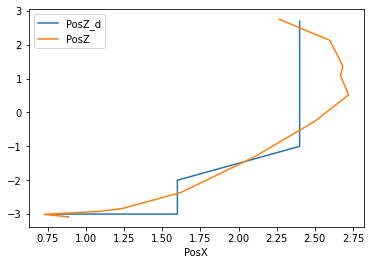

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
sample.plot(x='PosX_d', y='PosZ_d',ax=ax)
sample.plot(x='PosX', y='PosZ',ax=ax)

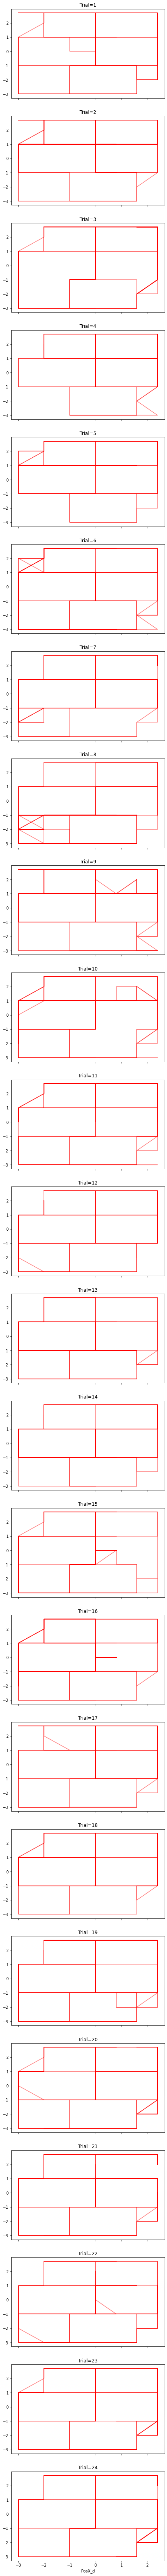

In [ ]:
grouped = trac.groupby('TrialID')
fig, axs = plt.subplots(24,figsize=(7,120),sharex=True, sharey=True)
i=0
for key, gp in grouped:
  for labels,dfi in gp.groupby("ID"):
    dfi.plot(ax=axs[i],x='PosX_d',y='PosZ_d',color ='red',alpha = 0.5)
  axs[i].set_title('Trial=%s'%key)
  axs[i].get_legend().remove()
  i=i+1
plt.show()

In [ ]:
import math

In [ ]:
def distance(x1,y1,x2,y2): #simple distance formula
    x = x1-x2
    y = y1-y2
    x = x**2
    y = y**2
    z = x+y
    return round(math.sqrt(z), 2)

In [ ]:
def total_dis(test):
    dist_tmp = 0
    test = test.reset_index().drop(['index'],axis=1)
    for i in range(len(test)-1):
        dist_tmp = dist_tmp + (distance(test.loc[i,'PosX_d'],test.loc[i,'PosZ_d'],test.loc[i+1,'PosX_d'],test.loc[i+1,'PosZ_d']))
    return dist_tmp

In [ ]:
trac.head()

,PosX_d,PosZ_d,ID,TrialID,TimeStamp,PosX,PosY,PosZ,Orient,Order
0,1.631836,-2.070312,401,19,196.0,1.700195,1.798828,-1.946289,88.6875,1
4,1.631836,-2.070312,401,19,197.0,1.622070,1.836914,-1.946289,92.1250,1
8,1.631836,-2.070312,401,19,198.0,1.625000,1.833984,-1.936523,86.1875,1
13,1.631836,-2.070312,401,19,199.0,1.686523,1.760742,-2.222656,189.3750,1
16,1.631836,-3.103516,401,19,199.0,1.532227,1.766602,-2.589844,252.3750,1


In [ ]:
dis_df = trac.groupby(['ID','TrialID']).apply(total_dis).reset_index().rename(columns={0:'total_dis'})

In [ ]:
dis_df.head()

,ID,TrialID,total_dis
0,401,1,12.3
1,401,2,5.7
2,401,3,11.3
3,401,4,4.5
4,401,5,6.1


In [ ]:
dis_df.total_dis.replace(0, np.nan, inplace=True)

In [ ]:
dis_df.loc[(dis_df.TrialID=='10') & (dis_df.total_dis == 2.32)] = np.nan

In [ ]:
# dis_df.groupby('TrialID')['total_dis'].min().reset_index().to_csv('min_dis_dis.csv',index=False)
dis_df.groupby('TrialID')['total_dis'].min().reset_index()

,TrialID,total_dis
0,1.0,8.10
1,2.0,3.70
2,3.0,8.30
3,4.0,4.50
4,5.0,3.80
5,6.0,8.60
6,7.0,6.81
7,8.0,4.21
8,9.0,4.78
9,10.0,6.01


In [ ]:
dis_df = dis_df.join(
    dis_df.groupby('TrialID')['total_dis'].aggregate([ 'min']),
    on='TrialID'
)
dis_df['Efficiency']=dis_df['total_dis']/dis_df['min']

In [ ]:
dis_df.head()

,ID,TrialID,total_dis,min,Efficiency
0,401,1,11.76,7.84,1.500000
1,401,10,10.83,5.78,1.873702
2,401,11,6.60,4.64,1.422414
3,401,12,6.59,3.71,1.776280
4,401,13,5.68,5.11,1.111546


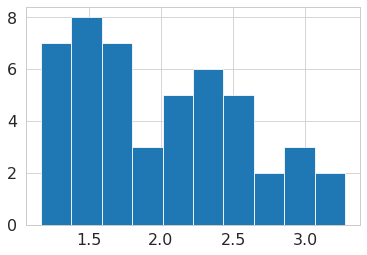

In [ ]:
dis_df.groupby(['ID'])['Efficiency'].mean().hist()

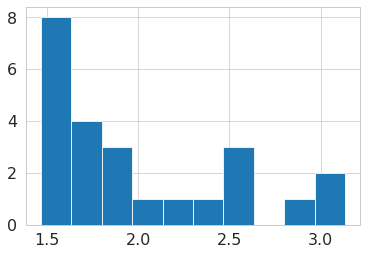

In [ ]:
dis_df.groupby(['TrialID'])['Efficiency'].mean().hist()

In [ ]:
dis_df.groupby(['TrialID'])['Efficiency'].mean()

TrialID
1     1.468112
10    1.710889
11    2.121423
12    2.813735
13    1.819757
14    3.134038
15    3.007186
16    2.583388
17    1.522266
18    2.514729
19    1.786505
2     2.542783
20    1.619371
21    1.515861
22    1.723589
23    1.510285
24    2.428463
3     1.551298
4     2.200976
5     1.940827
6     1.573581
7     1.567102
8     1.839211
9     1.761874
Name: Efficiency, dtype: float64

In [ ]:
sc_sub = dis_df.groupby('ID').Efficiency.mean().reset_index()
from functools import reduce
sub_performance = reduce(lambda x,y: pd.merge(x,y, on='ID',how='outer'),[pp1_sub,pp2_sub,sc_sub])

In [ ]:
sub_performance.dropna(inplace=True)

In [ ]:
sub_performance

,ID,PointPhaseI,PointPhaseII,Efficiency
0,401,80.167838,70.982890,2.022153
1,402,75.342183,19.569756,1.937021
2,403,22.049294,36.208874,1.486112
3,404,62.920977,23.746961,1.725421
4,405,33.383814,33.383814,1.286717
5,407,45.969860,26.651383,1.404855
6,408,8.214342,17.081531,1.170299
7,409,80.579622,45.347694,2.117609
8,410,64.801174,46.423964,1.943827
9,411,67.032162,30.136982,1.668870


In [ ]:
sub_performance.describe()

,PointPhaseI,PointPhaseII,Efficiency
count,47.000000,47.000000,47.000000
mean,64.949500,53.068478,2.021469
std,27.626455,28.388362,0.574296
min,8.214342,12.486380,1.170299
25%,48.102420,26.643366,1.493776
50%,74.326581,50.010197,1.943827
75%,85.701216,80.549727,2.435175
max,102.969844,99.969224,3.274762


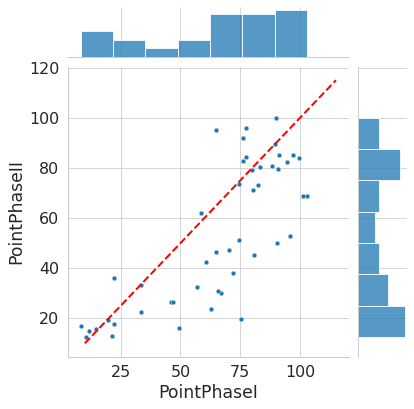

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper",font_scale=1.8)
g = sns.jointplot(data=sub_performance, x="PointPhaseI",y='PointPhaseII')
g.ax_joint.plot([10,115], [10,115], 'r--', linewidth = 2)


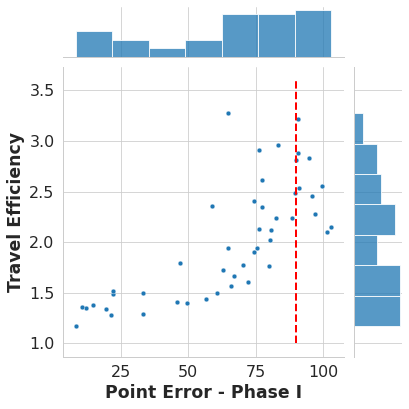

In [ ]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
g = sns.jointplot(data=sub_performance, x="PointPhaseI", y="Efficiency")
g.ax_joint.set_xlabel('Point Error - Phase I', fontweight='bold')
g.ax_joint.set_ylabel('Travel Efficiency', fontweight='bold')
g.ax_joint.plot([90,90], [1,3.6], 'r--', linewidth = 2)
plt.show()

In [ ]:
st_traj = scTraj.merge(standard, how = 'inner', left_on = ['ID','TrialID'],right_on = ['ParticipantID','TrialNumber'])

In [ ]:
scTraj.head()

,ID,TrialID,TimeStamp,PosX,PosY,PosZ,Orient,Order
0,401,19,195.750,1.700195,1.798828,-1.946289,88.6875,1
1,401,19,196.000,1.700195,1.798828,-1.944336,88.7500,1
2,401,19,196.250,1.682617,1.822266,-1.942383,87.5000,1
3,401,19,196.375,1.645508,1.833984,-1.937500,86.0000,1
4,401,19,196.625,1.622070,1.836914,-1.946289,92.1250,1


In [ ]:
sample = scTraj[scTraj.ID==401]

In [ ]:
grouped = sample.groupby('TrialID')

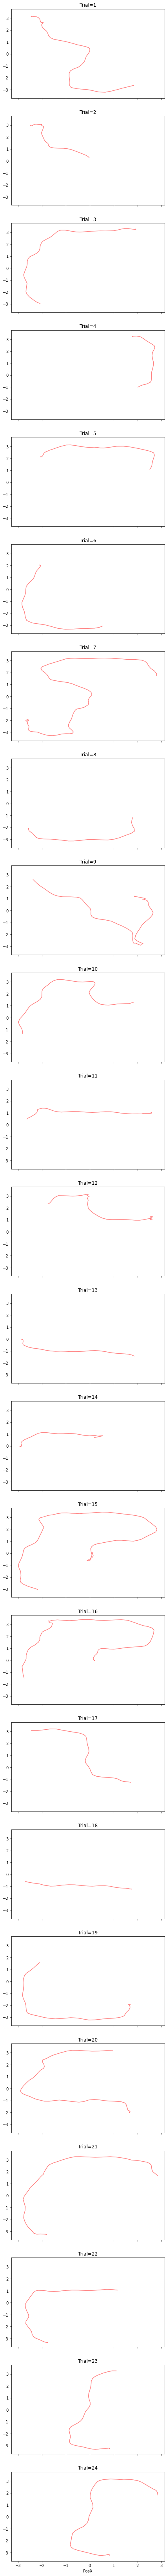

In [ ]:
fig, axs = plt.subplots(24,figsize=(7,120),sharex=True, sharey=True)
i=0
for key, gp in grouped:
  for labels,dfi in gp.groupby("ID"):
    dfi.plot(ax=axs[i],x='PosX',y='PosZ',color ='red',alpha = 0.5)
  axs[i].set_title('Trial=%s'%key)
  axs[i].get_legend().remove()
  i=i+1
plt.show()